# Linear Regression: Fuel Volume Growth (%) vs Brazilian GDP Growth (%)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel(r'G:\Meu Drive\Vida\UNICAMP\GMF\Challenges\CFA 2024\VBBR3\Modelagem - VBBR3\dados_vendas_entregas_imports ANP\dados jadas\dados_volume x pib_2017_2024_trimestral.xlsx')
data = data.set_index('Date')
data

# Calculate the z-scores of the data
z_scores = np.abs((data - data.mean()) / data.std())

# Define a threshold to identify outliers
threshold = 3

# Filter out the outliers
clean_data = data[(z_scores < threshold).all(axis=1)]

clean_data

,Volume Growth (%),Brazilian GDP (%),Total Volume,GDP (R$ th)
Date,,,,
2018-03-31,0.010666,0.019050,27848.000000,1.682083e+06
2018-06-30,-0.032328,0.016171,27468.000000,1.734099e+06
2018-09-30,-0.005163,0.020568,30046.000000,1.767856e+06
2018-12-31,0.019321,0.015546,30388.000000,1.820103e+06
2019-03-31,0.018405,0.009013,28360.000000,1.757554e+06
2019-06-30,0.065595,0.011725,29270.000000,1.826761e+06
2019-09-30,0.032413,0.011095,31020.000000,1.880610e+06
2019-12-31,0.028586,0.016939,31256.000000,1.924206e+06
2020-03-31,-0.005439,0.004140,28206.000000,1.868095e+06


In [4]:
import statsmodels.api as sm

# Define the dependent and independent variables
X = clean_data['Brazilian GDP (%)']
Y = clean_data['Volume Growth (%)']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Perform the OLS regression
model = sm.OLS(Y, X).fit()

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Volume Growth (%)   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     12.63
Date:                seg, 11 nov 2024   Prob (F-statistic):            0.00169
Time:                        11:52:50   Log-Likelihood:                 58.637
No. Observations:                  25   AIC:                            -113.3
Df Residuals:                      23   BIC:                            -110.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0026      0.00

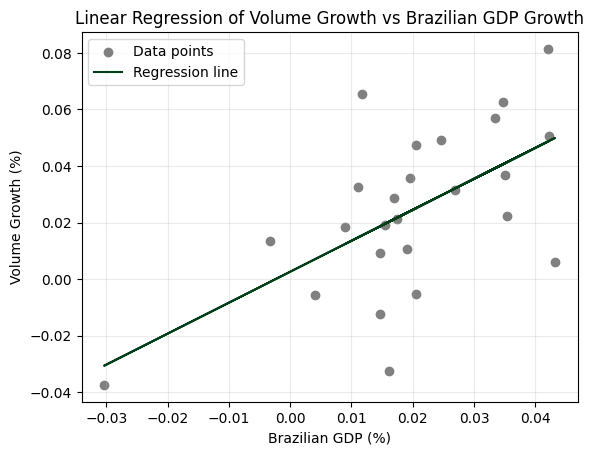

In [5]:
# Scatter plot of the data
plt.scatter(clean_data['Brazilian GDP (%)'], clean_data['Volume Growth (%)'], color='gray', label='Data points')

# Regression line
plt.plot(clean_data['Brazilian GDP (%)'], model.predict(X), color='#033F19', label='Regression line')

# Adding labels and title
plt.xlabel('Brazilian GDP (%)')
plt.ylabel('Volume Growth (%)')
plt.title('Linear Regression of Volume Growth vs Brazilian GDP Growth')
plt.legend()

# Show plot
plt.grid(True, alpha= 0.25)
plt.show()